# Analyzing the OnlineFoods Dataset

# step1:Load and Preprocess the dataset

# Load the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r'C:\Users\umade\Downloads\online_foods.xlsx',header=0)
df.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Pin code,Feedback
0,20,Female,Single,Student,Post Graduate,4,560001,Positive
1,24,Female,Single,Student,Graduate,3,560009,Positive
2,22,Male,Single,Student,Post Graduate,3,560017,Negative
3,22,Female,Single,Student,Graduate,6,560019,Positive
4,22,Male,Single,Student,Post Graduate,4,560010,Positive


In [4]:
df.shape

(388, 8)

In [5]:
df.dtypes

Age                            int64
Gender                        object
Marital Status                object
Occupation                    object
Educational Qualifications    object
Family size                    int64
Pin code                       int64
Feedback                      object
dtype: object

In [6]:
df.describe()

,Age,Family size,Pin code
count,388.000000,388.000000,388.000000
mean,24.628866,3.280928,560040.113402
std,2.975593,1.351025,31.399609
min,18.000000,1.000000,560001.000000
25%,23.000000,2.000000,560010.750000
50%,24.000000,3.000000,560033.500000
75%,26.000000,4.000000,560068.000000
max,33.000000,6.000000,560109.000000


In [7]:
df.describe(include=object)

,Gender,Marital Status,Occupation,Educational Qualifications,Feedback
count,388,388,388,388,388
unique,2,3,2,3,2
top,Male,Single,Student,Post Graduate,Positive
freq,222,268,216,197,317


# Handling Missing values

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Educational Qualifications    0
Family size                   0
Pin code                      0
Feedback                      0
dtype: int64

##There is no missing values

In [9]:
df.corr()

,Age,Family size,Pin code
Age,1.000000,0.169982,0.137294
Family size,0.169982,1.000000,-0.009402
Pin code,0.137294,-0.009402,1.000000


<AxesSubplot:xlabel='Occupation', ylabel='count'>

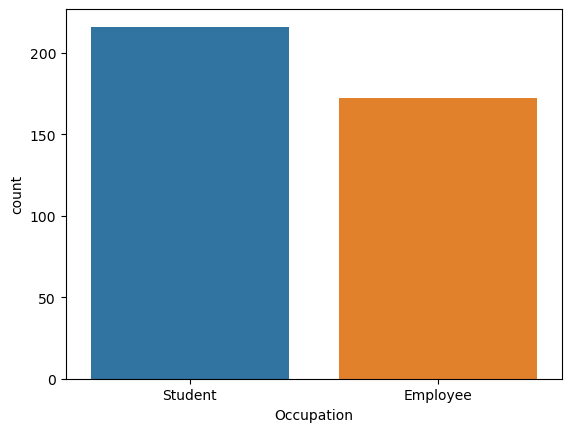

In [10]:
sns.countplot(x="Occupation",data=df)

<AxesSubplot:xlabel='Educational Qualifications', ylabel='count'>

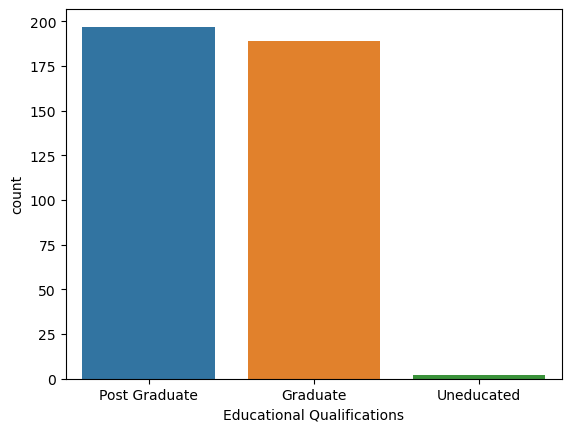

In [11]:
sns.countplot(x='Educational Qualifications',data=df)

<AxesSubplot:xlabel='Feedback', ylabel='count'>

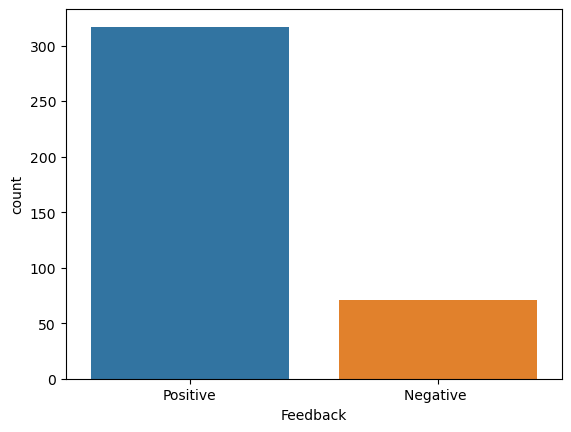

In [12]:
sns.countplot(x='Feedback',data=df)

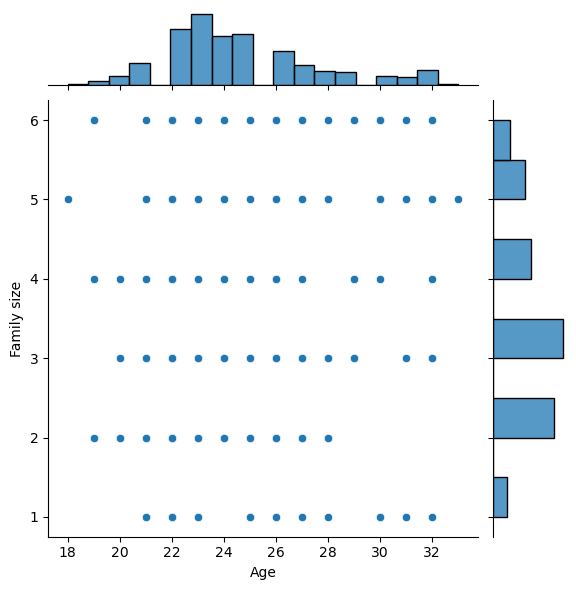

In [13]:
sns.jointplot(x='Age',y='Family size',data=df)

# Encode categorical variables

In [14]:
df_encoded = pd.get_dummies(df,columns=["Gender","Marital Status","Occupation","Educational Qualifications","Feedback"] ,drop_first=True)
df_encoded.head()


,Age,Family size,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated,Feedback_Positive
0,20,4,560001,0,0,1,1,1,0,1
1,24,3,560009,0,0,1,1,0,0,1
2,22,3,560017,1,0,1,1,1,0,0
3,22,6,560019,0,0,1,1,0,0,1
4,22,4,560010,1,0,1,1,1,0,1


# Check for outliers

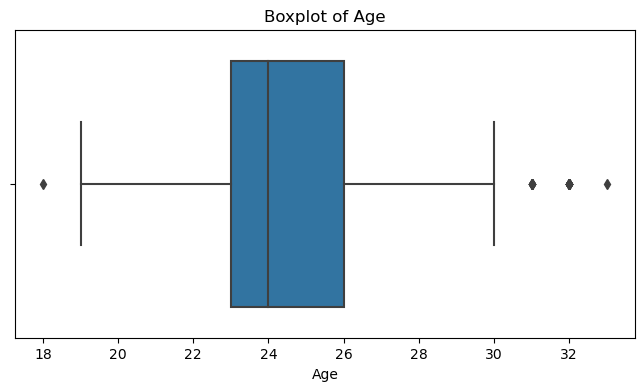

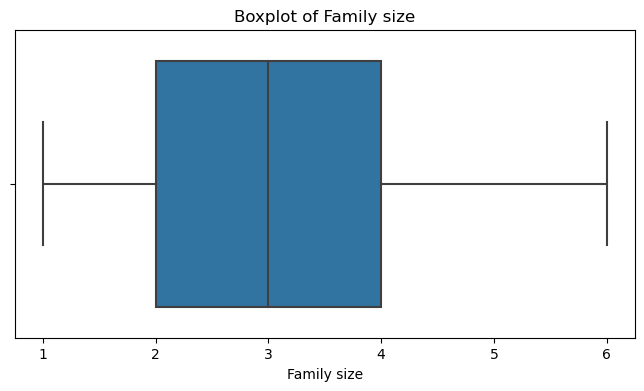

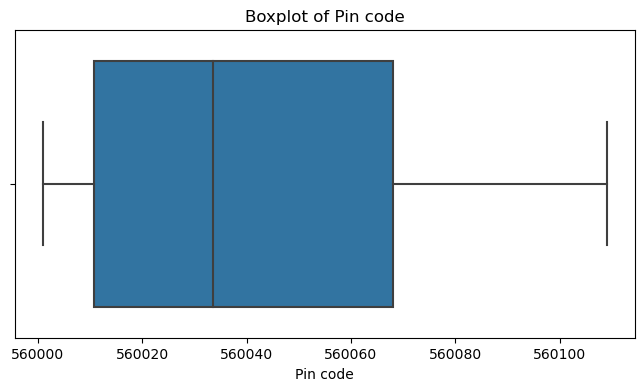

In [15]:
for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_encoded[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

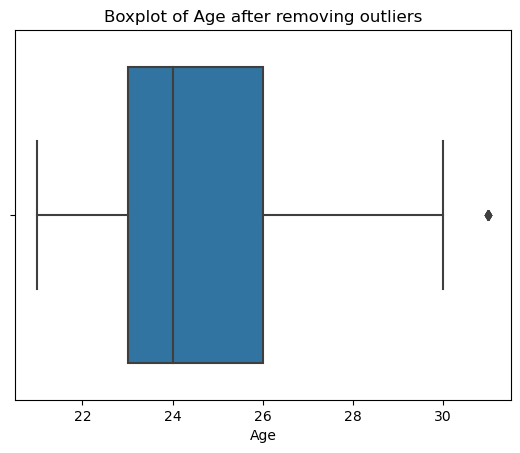

In [16]:
Q1 = df['Age'].quantile(0.05)
Q3 = df['Age'].quantile(0.95)
df = df[(df['Age'] >= Q1) & (df['Age'] <= Q3)]
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age after removing outliers')
plt.show()


# Step 2: Split Data into Training and Testing sets

In [17]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['Feedback_Positive'], axis=1)
y = df_encoded['Feedback_Positive']

In [18]:
X.head()

,Age,Family size,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated
0,20,4,560001,0,0,1,1,1,0
1,24,3,560009,0,0,1,1,0,0
2,22,3,560017,1,0,1,1,1,0
3,22,6,560019,0,0,1,1,0,0
4,22,4,560010,1,0,1,1,1,0


In [19]:
X.shape

(388, 9)

In [20]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Feedback_Positive, dtype: uint8

In [21]:
y.shape

(388,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step3:Train and Evaluate Models


# Train Models and Evaluate Performance

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


# 1.Logistic Regression

In [27]:
import statsmodels.api as sn
X_cons=sn.add_constant(X)
import statsmodels.discrete.discrete_model as sm
from sklearn.linear_model import LogisticRegression


In [28]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.683665
         Iterations 25


In [29]:
logit.summary()

C:\Users\umade\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\umade\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\umade\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Feedback_Positive   No. Observations:                  388
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                     inf
Time:                        23:29:55   Log-Likelihood:                -265.26
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -2443.4695   2570.079     -0.951      0.342   -7480.731    2593.792
Age                                         -0.0591      0.061     -0.976      0.329      -0.178       0.060
Family size                                  0.0318      0.104      0.307      0.759      -0.171       0.235
Pin code                                     0.0044      0.005      0.952      0.341      -0.005       0.013
Gender_Male                                 -0.1030      0.289     -0.356      0.722      -0.670       0.464
Marital Status_Prefer not to say            -0.7382      0.650     -1.136      0.256      -2.012       0.536
Marital Status_Single                        0.1861      0.399      0.466      0.641      -0.596       0.968
Occupation_Student                           0.8523      0.355      2.400      0.016       0.156       1.548
Educational Qualifications_Post Graduate     0.5885      0.289      2.034      0.042       0.022       1.156
Educational Qualifications_Uneducated       -0.7650      1.491     -0.513      0.608      -3.688       2.158
============================================================================================================
"""

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [31]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [32]:
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
[[ 0 11]
 [ 0 67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      1.00      0.92        67

    accuracy                           0.86        78
   macro avg       0.43      0.50      0.46        78
weighted avg       0.74      0.86      0.79        78



C:\Users\umade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
accuracy_score(y_test,y_pred_log_reg)

0.8589743589743589

# 2.Linear Discriminant Analysis(LDA)

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)


LinearDiscriminantAnalysis()

In [35]:
y_pred_lda = lda.predict(X_test_scaled)

In [36]:
print("Linear Discriminant Analysis Performance:")
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

Linear Discriminant Analysis Performance:
[[ 0 11]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.99      0.92        67

    accuracy                           0.85        78
   macro avg       0.43      0.49      0.46        78
weighted avg       0.74      0.85      0.79        78



In [37]:
accuracy_score(y_test,y_pred_lda)

0.8461538461538461

# 3.K-Nearest Neighbours(KNN)

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred_knn = knn.predict(X_test_scaled)

C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
confusion_matrix(y_test, y_pred_knn)

array([[ 4,  7],
       [11, 56]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred_knn)

0.7692307692307693

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
confusion_matrix(y_test,y_pred_knn)


array([[ 4,  7],
       [11, 56]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred_knn)

0.7692307692307693

In [46]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}

In [48]:
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params)
grid_search_cv.fit(X_train_scaled,y_train)

C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [49]:
grid_search_cv.best_params_

{'n_neighbors': 9}

In [50]:
optimised_KNN=grid_search_cv.best_estimator_
y_test_pred=optimised_KNN.predict(X_test_scaled)

C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
confusion_matrix(y_test ,y_test_pred)

array([[ 1, 10],
       [ 2, 65]], dtype=int64)

In [52]:
accuracy_score(y_test,y_test_pred)

0.8461538461538461

# 4.Decision Tree Classifier

In [53]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [54]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
y_train_pred=clftree.predict(X_train)
y_test_pred=clftree.predict(X_test)

In [56]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [57]:
confusion_matrix(y_train,y_train_pred)

array([[  6,  54],
       [  0, 250]], dtype=int64)

In [58]:
confusion_matrix(y_test,y_test_pred)

array([[ 1, 10],
       [ 0, 67]], dtype=int64)

In [59]:
accuracy_score(y_test,y_test_pred)

0.8717948717948718